# **Olist E-Commerce Sales Analytics**

-Yashas N

After cleaning raw data

In [2]:
# 0. Imports and display settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Notebook display niceties
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 200)
plt.rcParams['figure.figsize'] = (10,5)


In [3]:
# 1. Load merged data (or run merge if you don't have clean file)
# If you already have 'clean_merged_data.csv' from the cleaning step:
try:
    df = pd.read_csv('clean_merged_data.csv', parse_dates=['order_purchase_timestamp',
                                                          'order_approved_at',
                                                          'order_delivered_carrier_date',
                                                          'order_delivered_customer_date',
                                                          'order_estimated_delivery_date'])
    print("Loaded clean_merged_data.csv")
except FileNotFoundError:
    print("clean_merged_data.csv not found — performing quick merge from raw CSVs")
    orders = pd.read_csv('olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp',
                                                                 'order_approved_at',
                                                                 'order_delivered_carrier_date',
                                                                 'order_delivered_customer_date',
                                                                 'order_estimated_delivery_date'], infer_datetime_format=True)
    items = pd.read_csv('olist_order_items_dataset.csv')
    payments = pd.read_csv('olist_order_payments_dataset.csv')
    reviews = pd.read_csv('olist_order_reviews_dataset.csv', parse_dates=['review_creation_date','review_answer_timestamp'], infer_datetime_format=True)
    customers = pd.read_csv('olist_customers_dataset.csv')
    products = pd.read_csv('olist_products_dataset.csv')
    cat = pd.read_csv('product_category_name_translation.csv')

    # merge minimal useful tables
    df = (orders
          .merge(items, on='order_id', how='left')
          .merge(payments, on='order_id', how='left')
          .merge(reviews[['order_id','review_score']], on='order_id', how='left')
          .merge(customers[['customer_id','customer_unique_id','customer_city','customer_state']], on='customer_id', how='left')
          .merge(products[['product_id','product_category_name']], on='product_id', how='left')
          .merge(cat, on='product_category_name', how='left')
         )

    # Derived fields
    df['delivery_time_days'] = (pd.to_datetime(df['order_delivered_customer_date']) - pd.to_datetime(df['order_purchase_timestamp'])).dt.days
    df['delay_vs_estimate_days'] = (pd.to_datetime(df['order_delivered_customer_date']) - pd.to_datetime(df['order_estimated_delivery_date'])).dt.days
    df['is_late'] = df['delay_vs_estimate_days'] > 0
    df['order_month'] = pd.to_datetime(df['order_purchase_timestamp']).dt.to_period('M')
    df.to_csv('clean_merged_data.csv', index=False)
    print("Merged and saved as clean_merged_data.csv")



Loaded clean_merged_data.csv


In [ ]:
# Quick look
print("Rows,Cols:", df.shape)
df.head()


Rows,Cols: (119143, 28)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_city,customer_state,product_category_name,product_category_name_english,delivery_time_days,delay_vs_estimate_days,is_late,order_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,4.0,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,utilidades_domesticas,housewares,8.0,-8.0,False,2017-10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,4.0,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,utilidades_domesticas,housewares,8.0,-8.0,False,2017-10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,4.0,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,utilidades_domesticas,housewares,8.0,-8.0,False,2017-10
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,4.0,af07308b275d755c9edb36a90c618231,barreiras,BA,perfumaria,perfumery,13.0,-6.0,False,2018-07
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,5.0,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,automotivo,auto,9.0,-18.0,False,2018-08


#Insight 1 — Top Product Categories by Revenue (revenue = price * quantity)

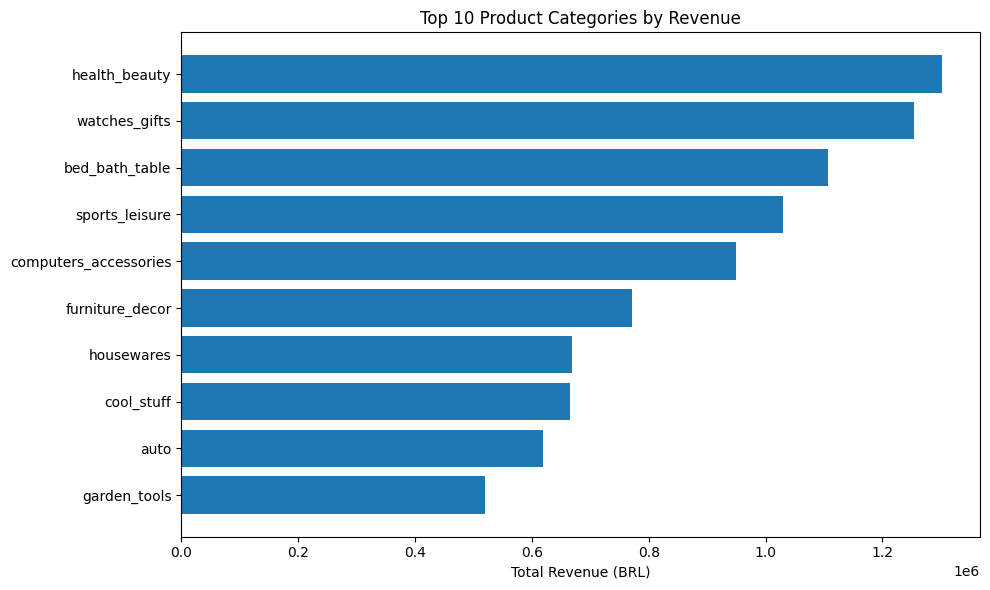

In [4]:
# prepare revenue by category
df['price'] = pd.to_numeric(df['price'], errors='coerce').fillna(0)
revenue_by_cat = df.groupby('product_category_name_english')['price'].sum().reset_index().sort_values('price', ascending=False)
revenue_by_cat_top10 = revenue_by_cat.head(10)

# Plot
plt.figure(figsize=(10,6))
plt.barh(revenue_by_cat_top10['product_category_name_english'][::-1], revenue_by_cat_top10['price'][::-1])
plt.xlabel('Total Revenue (BRL)')
plt.title('Top 10 Product Categories by Revenue')
plt.tight_layout()
plt.show()


#Insight 2 — Late Delivery Strongly Correlates with Lower Review Scores

   is_late      mean   count
0    False  4.210506  108163
1     True  2.322794    7559


/tmp/ipython-input-3097060422.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([scores_on_time, scores_late], labels=['On time','Late'])


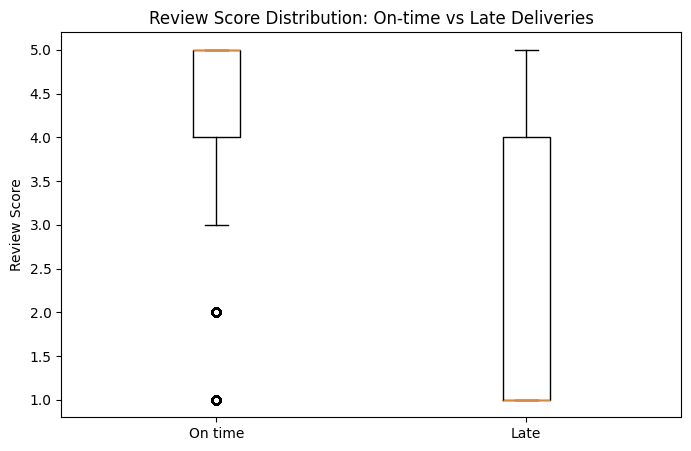

In [6]:
# Remove weird rows where delivery_time negative or NaN
mask = df['delivery_time_days'].notnull() & (df['delivery_time_days'] >= 0)
tmp = df[mask].copy()
# group by whether late
tmp['is_late'] = (tmp['delay_vs_estimate_days'] > 0)
late_vs_score = tmp.groupby('is_late')['review_score'].agg(['mean','count']).reset_index()

print(late_vs_score)

# Boxplot style visualization
scores_late = tmp[tmp['is_late']==True]['review_score'].dropna()
scores_on_time = tmp[tmp['is_late']==False]['review_score'].dropna()

plt.figure(figsize=(8,5))
plt.boxplot([scores_on_time, scores_late], labels=['On time','Late'])
plt.ylabel('Review Score')
plt.title('Review Score Distribution: On-time vs Late Deliveries')
plt.show()


#Insight 3 — State / City Distribution: Where Most Orders Come From

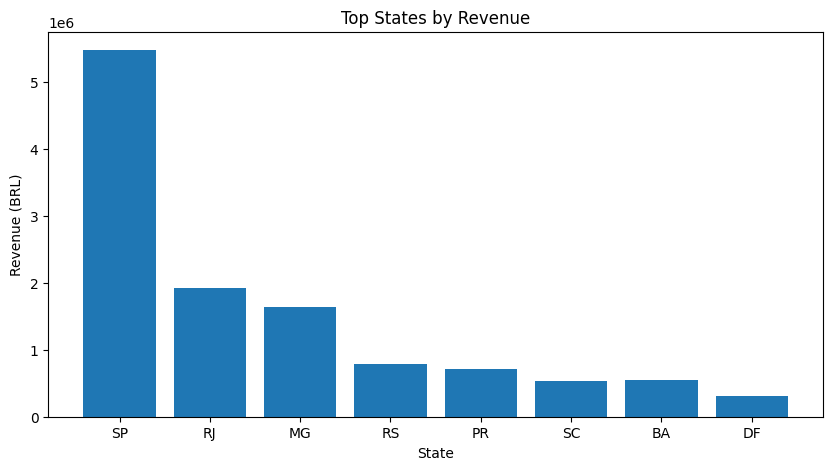

In [7]:
# Top states by order count and revenue
state_orders = df.groupby('customer_state').agg(
    order_count=('order_id','nunique'),
    total_revenue=('price','sum')
).reset_index().sort_values('order_count', ascending=False)

state_orders.head(10)

# Plot top 8 states by revenue
top_states = state_orders.head(8)
plt.figure(figsize=(10,5))
plt.bar(top_states['customer_state'], top_states['total_revenue'])
plt.title('Top States by Revenue')
plt.xlabel('State')
plt.ylabel('Revenue (BRL)')
plt.show()


#Insight 4 — Payment Type vs Average Order Value

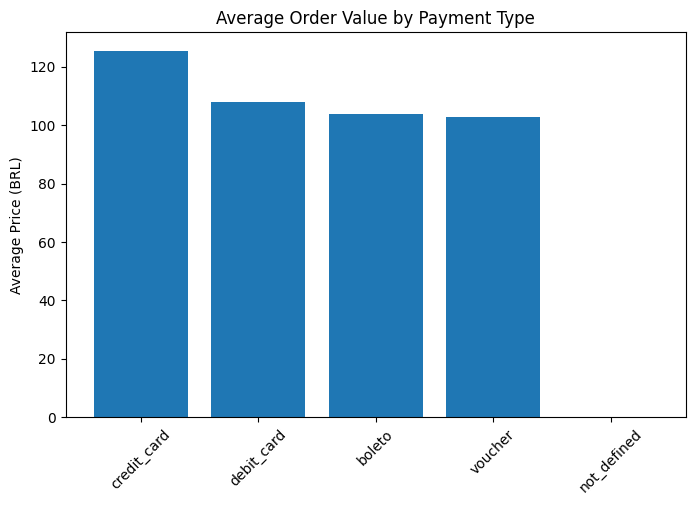

In [8]:
# Aggregate payment types
pay_agg = df.groupby('payment_type')['price'].agg(['count','mean','sum']).reset_index().sort_values('mean', ascending=False)
pay_agg['mean'] = pay_agg['mean'].round(2)
pay_agg
# Plot average order value per payment type
plt.figure(figsize=(8,5))
plt.bar(pay_agg['payment_type'], pay_agg['mean'])
plt.title('Average Order Value by Payment Type')
plt.ylabel('Average Price (BRL)')
plt.xticks(rotation=45)
plt.show()


#Insight 5 — Monthly Sales Trend & Seasonal Peaks (Black Friday, Year-end)

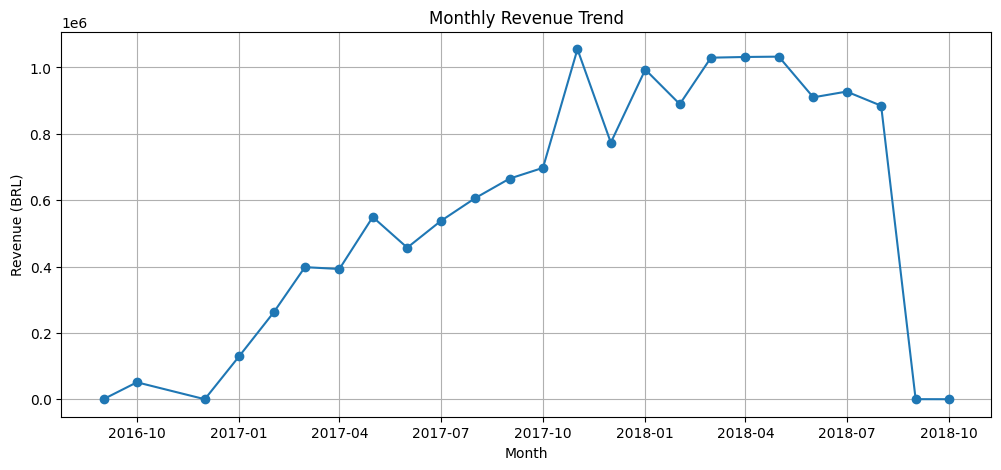

In [9]:
# Monthly sales (by order count and revenue)
sales_month = df.copy()
sales_month['order_month'] = pd.to_datetime(sales_month['order_purchase_timestamp']).dt.to_period('M')
monthly = sales_month.groupby('order_month').agg(order_count=('order_id','nunique'), revenue=('price','sum')).reset_index()
monthly['order_month'] = monthly['order_month'].dt.to_timestamp()

# Plot revenue trend
plt.figure(figsize=(12,5))
plt.plot(monthly['order_month'], monthly['revenue'], marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue (BRL)')
plt.grid(True)
plt.show()


The primary reason for the apparent drop-off in Olist sales in late 2018 is that the publicly available dataset ends in September 2018, leading to a sharp decline in recorded orders for that month.
Beyond the dataset limitation, Olist's performance in 2018 also faced some genuine business challenges as transaction volumes increased:
Logistics Issues: The rate of late deliveries increased from 5.65% in 2017 to 7.73% in 2018, which negatively impacted customer satisfaction.
Increased Bad Reviews: The rate of bad reviews (1 star) also rose slightly, from 13.88% in 2017 to 15.11% in 2018, suggesting potential issues with product quality or service as the business scaled.
Low Customer Loyalty: Analysis of the data indicated a general lack of customer loyalty and a low repeat purchase rate, which could make sales trends more volatile and susceptible to competition.
Seasonal Variation: There is a natural seasonal decline in sales volume in December after the November peak (likely Black Friday/holiday shopping).

In [13]:
delay_by_cat = df[df['is_late']==True].groupby('product_category_name_english').agg(
    total_late_orders=('order_id','nunique'),
    avg_delay_days=('delay_vs_estimate_days','mean'),
    avg_review=('review_score','mean')
).reset_index()

# Sort by total late orders
delay_by_cat = delay_by_cat.sort_values('total_late_orders', ascending=False).head(10)
delay_by_cat


,product_category_name_english,total_late_orders,avg_delay_days,avg_review
7,bed_bath_table,689,10.931677,2.286957
40,health_beauty,650,9.749009,2.375165
59,sports_leisure,495,10.565693,2.246350
36,furniture_decor,449,10.610544,2.408163
14,computers_accessories,417,10.474206,2.376984
64,watches_gifts,406,9.833713,2.230068
46,housewares,308,11.654596,2.284123
62,telephony,291,9.102484,2.406832
5,auto,278,12.281879,2.379195
63,toys,243,10.880597,2.212687


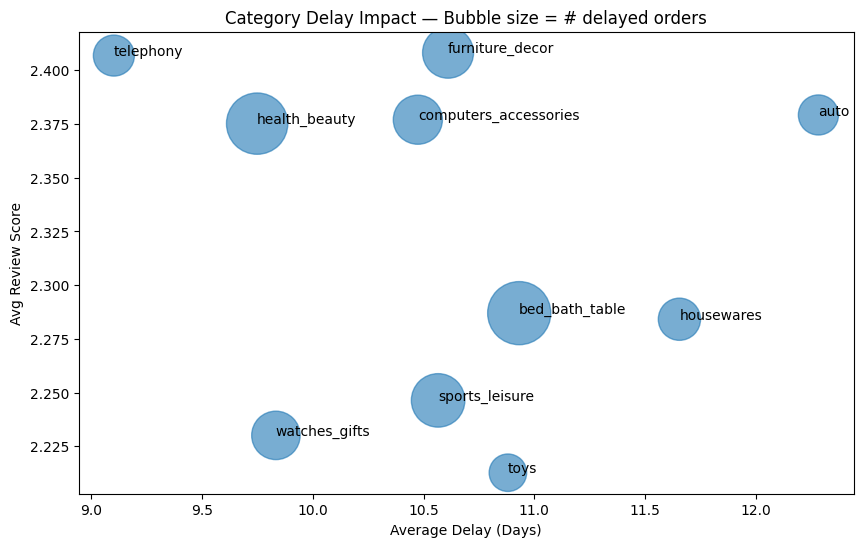

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(delay_by_cat['avg_delay_days'], delay_by_cat['avg_review'],
            s=delay_by_cat['total_late_orders']*3, alpha=0.6)

for i in range(len(delay_by_cat)):
    plt.text(delay_by_cat['avg_delay_days'].iloc[i],
             delay_by_cat['avg_review'].iloc[i],
             delay_by_cat['product_category_name_english'].iloc[i])

plt.xlabel('Average Delay (Days)')
plt.ylabel('Avg Review Score')
plt.title('Category Delay Impact — Bubble size = # delayed orders')
plt.show()


/tmp/ipython-input-1926813698.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, vert=False, showfliers=False)


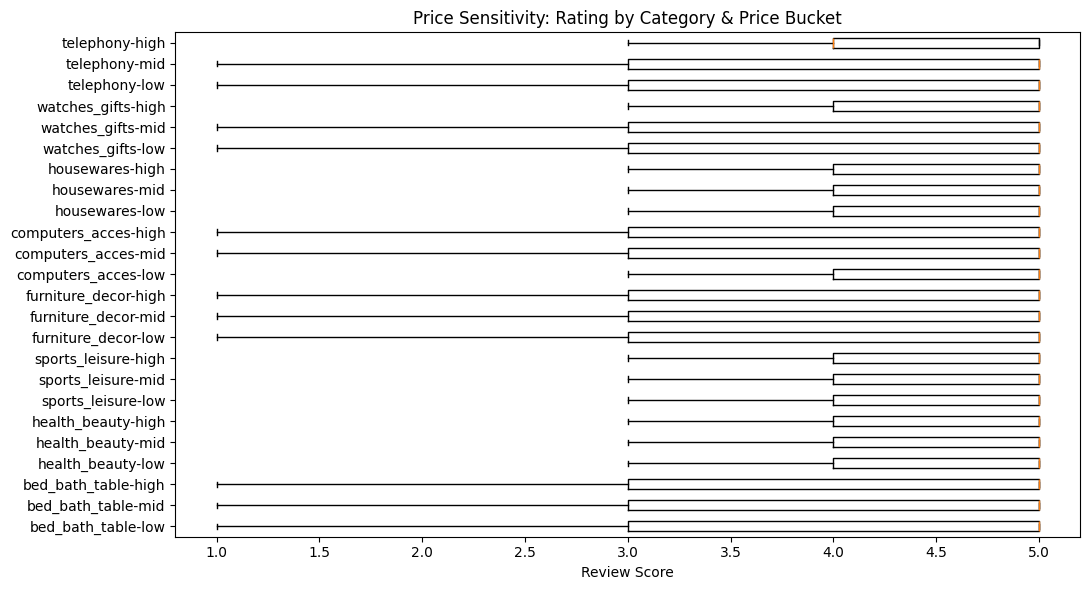

✅ Saved boxplot + category_price_review_summary.csv


/tmp/ipython-input-1926813698.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = subset.groupby(['product_category_name_english','price_bucket']).agg(


In [18]:
# Cap price outliers & create 3 segments
price_cap = df['price'].quantile(0.99)
df['price_capped'] = df['price'].clip(0, price_cap)
df['price_bucket'] = pd.qcut(df['price_capped'].rank(method='first'), 3, labels=['low','mid','high'])

# Take top 8 categories by order volume
top_cats = df['product_category_name_english'].value_counts().head(8).index.tolist()
subset = df[df['product_category_name_english'].isin(top_cats)]

# Boxplot for each category/bucket
groups = []
labels = []
for cat in top_cats:
    for bucket in ['low','mid','high']:
        vals = subset[(subset['product_category_name_english']==cat) & (subset['price_bucket']==bucket)]['review_score']
        groups.append(vals.dropna())
        labels.append(f"{cat[:15]}-{bucket}")

plt.figure(figsize=(11,6))
plt.boxplot(groups, labels=labels, vert=False, showfliers=False)
plt.xlabel("Review Score")
plt.title("Price Sensitivity: Rating by Category & Price Bucket")

plt.tight_layout()
plt.savefig("olist_analysis_outputs/category_price_review_boxplots.png", dpi=150)
plt.show()

print("✅ Saved boxplot + category_price_review_summary.csv")

# Save summary table
summary = subset.groupby(['product_category_name_english','price_bucket']).agg(
    median_review=('review_score','median'),
    mean_review=('review_score','mean'),
    count=('order_id','nunique')
).reset_index()

summary.to_csv("olist_analysis_outputs/category_price_review_summary.csv", index=False)
